# PythTB v2.0 Tutorial
This notebook will walk you through all of the changes and new-features in v2.0 of `pythtb`. 

The first things to be aware of is that the module names have been changed
-  < v1.8: `tb_model`, `wf_array`
- 2.0: `TBModel`, `WFArray`

This needs to be changed at the import line

In [1]:
from pythtb import TBModel, WFArray

### `models` library

A collection of `TBModel` generators for prototypical tight-binding models has been included in `pythtb.models`. The models are
- checkerboard
- haldane
- kane-mele
- graphene

As an example, we can import the Haldane tight-binding model to demonstrate the new features of PythTB v2.0.

In [2]:
from pythtb.models import haldane

In [ ]:
my_model = haldane(delta=0.1, t1=1.0, t2=0.1)

### Reporting the model information

To see the model information, previously one would call
```python
# v1.8
my_model.display()
```

In v2.0, `display` is now called `report`. An alternative way of seeing the same information is to simply print the model
```python
# v2.0
print(my_model)
# or
my_model.report()
```

In [7]:
print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
Site energies:
  # 0 ===> -0.100 
  # 1 ===>  0.100 
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> 1.0000 
  < 0 | H | 1 + [-1.0 ,  0.0 ] >  ===> 1.0000 
  < 0 | H | 1 + [ 0.0 , -1.0 ] >  ===> 1.0000 
  < 0 | H | 0 + [ 1.0 ,  0.0 ] >  ===> 0.0000+0.1000j
  < 1 | H | 1 + [ 1.0 ,  0.0 ] >  ===> 0.0000-0.1000j
  < 0 | H | 0 + [-1.0 ,  1.0 ] >  ===> 0.0000+0.1000j
  < 1 | H | 1 + [-1.0 ,  1.0 ] >  ===> 0.0000-0.1000j
  < 0 | H | 0 + [ 0.0 , -1.0 ] >  ===> 0.0000+0.1000j
  < 1 | H | 1 + [ 0.0 ,

### Band plotting

A new feature to `TBModel`'s is a convience function for quickly plotting band structures. Instead of explictly creating the k-path, marking the high-symmetry k-points, and so-on, now we just call `plot_bands` and pass the high-symmetry points in reduced units.

(<Figure size 640x480 with 1 Axes>, <Axes: ylabel='Energy $E(\\mathbf{{k}})$'>)

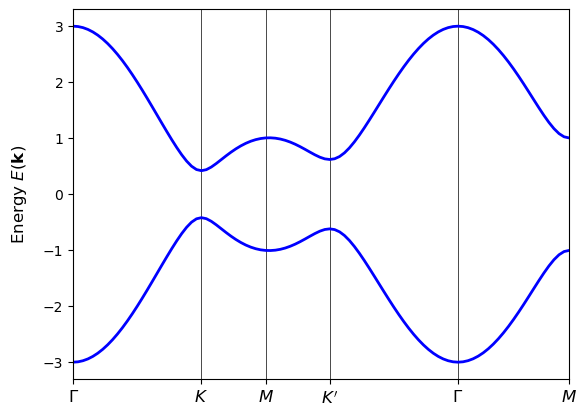

In [ ]:
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
k_label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')

my_model.plot_bands(k_path=k_path, k_label=k_label)

An optional flag allows one to visualize the orbital character of the bands. To do so, we provide a list to `proj_orb_idx`. The list defines the indices of the orbitals to project the eigenstates onto. This will show a colorbar displaying the weight of the eigenstates onto that sublattice.

In this example, the Haldane model demonstrates a band inversion at the $K$ and $K'$ points, a hallmark of the topological phase transition.

(<Figure size 640x480 with 2 Axes>, <Axes: ylabel='Energy $E(\\mathbf{{k}})$'>)

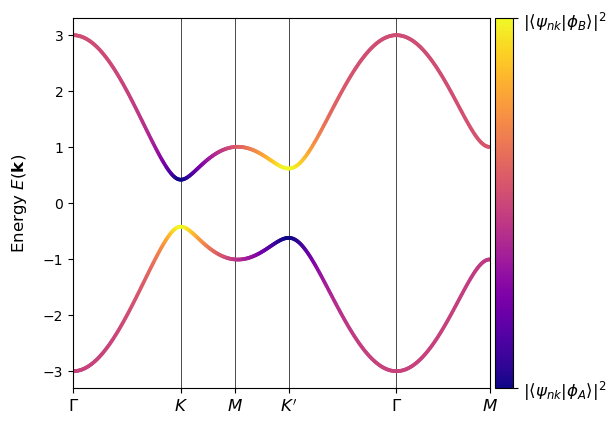

In [12]:
my_model.plot_bands(nk=500, k_path=k_path, k_label=k_label, proj_orb_idx=[1])

### Visualizing the tight-binding model

The visualization of the tight-binding model orbital positions and hopping bonds has been updated. As before we call `my_model.visualize` in order see the tight-binding lattice

(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='Cartesian coordinate 0', ylabel='Cartesian coordinate 1'>)

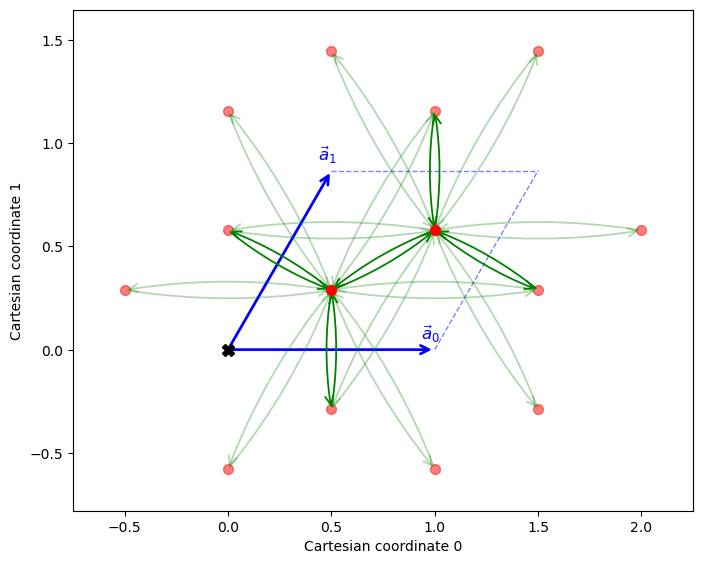

In [13]:
my_model.visualize()

### Berry curvature

The `TBModel` class now has the ability to compute the velocity operator as
$$
\hbar v_\alpha = \partial_{\alpha} H_{\mathbf{k}} 
$$
From this, we can also compute the Berry curvature arising from band mixing,
$$
\Omega^{(\alpha,\beta)}_n = \frac{1}{\hbar}\sum_{m\neq n} 
\frac{\langle u_{nk}| v_{k}^{\alpha} | u_{mk} \rangle \langle u_{mk} | v_{k}^{\beta}| u_{nk}\rangle}{(E_{mk} - E_{nk})^2}
$$
Which allows us to obtain a Chern number for a gapped manifold of states. In this case, we can compute the Chern numbers for the upper and lower bands. 

> NOTE: The convergence to an integer value is generally slower than the plaquette method based on Wilson loops in `WFArray`.

In [14]:
print("Chern number band 0:", my_model.chern([0], nk=200))
print("Chern number band 1:", my_model.chern([1], nk=200))

Chern number band 0: -1.0000000000000002
Chern number band 1: 1.0000000000000002


We can visualize the Berry curvature distribution for the occupied band in the two-dimensional Brillouin zone. 

We first begin my setting the k-mesh for our model. We do so by calling `set_k_mesh` passing the number of discretized k-points along each reciprocal lattice vector direction. We then retrieve a flattened array of k-points with `get_k_mesh(flat=True)`

In [16]:
nkx = nky = 50
my_model.set_k_mesh([nkx, nky])
flat_mesh = my_model.get_k_mesh(flat=True)

We now call `berry_curvature` passing our flattened array of k-points, the occupied band indices, and an optional flag `cartesian=True`. The `cartesian` flag only affects the magnitude of the Berry curvature, since the Berry curvature is dimensionful.

In [22]:
berry_curv = my_model.berry_curvature(k_pts=flat_mesh, occ_idxs=[0], cartesian=True)
print(berry_curv.shape)

(2, 2, 2500)


The returned Berry curvature array has two initial axes that are size $2$ defining the two Cartesian directions (e.g., $\Omega_{xy}$). By definition $\Omega_{xy} = -\Omega_{yx}$ and $\Omega_{xx} = \Omega_{yy} = 0$, so we can consider only the top right block. Furthermore, the Berry curvature is real, so we will take the real part.

In [23]:
berry_curv = berry_curv[0,1].real

To plot the Berry curvature on the reciprocal lattice, we must convert our dimensionless k-mesh to a dimensionful one. We will also reshape the berry curvature to have axes along each reciprocal lattice direction instead of being flattened 

In [24]:
sq_mesh = my_model.get_k_mesh(flat=False)
recip_lat_vecs = my_model.get_recip_lat()
mesh_Cart = sq_mesh @ recip_lat_vecs

KX = mesh_Cart[:, :, 0]
KY = mesh_Cart[:, :, 1]

berry_curv = berry_curv.reshape((nkx, nky))
print(berry_curv.shape)

(50, 50)


Text(0.5, 1.0, 'Berry curvature from TBModel')

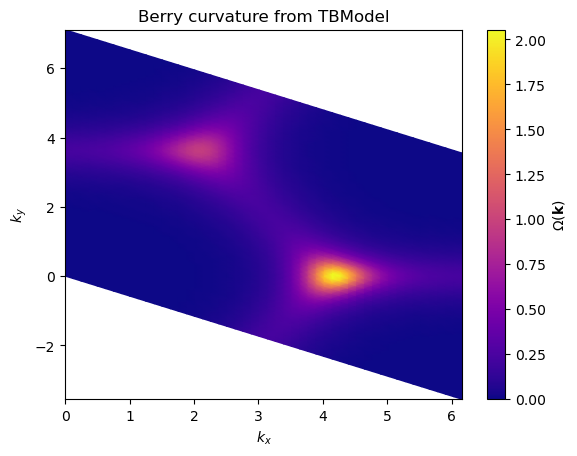

In [25]:
import matplotlib.pyplot as plt

im = plt.pcolormesh(KX, KY, abs(berry_curv), cmap='plasma', shading='gouraud')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.colorbar(label=r'$\Omega(\mathbf{k})$')
plt.title('Berry curvature from TBModel')